# Part 1: Build a classification model using text data

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


In [ ]:
pip install aimodelshare

     |████████████████████████████████| 121 kB 5.3 MB/s 
     |████████████████████████████████| 78 kB 4.5 MB/s 
     |████████████████████████████████| 12.7 MB 21.3 MB/s 
     |████████████████████████████████| 131 kB 56.4 MB/s 
     |████████████████████████████████| 146 kB 56.3 MB/s 
     |████████████████████████████████| 7.7 MB 12.3 MB/s 
     |████████████████████████████████| 435 kB 75.1 MB/s 
     |████████████████████████████████| 22.3 MB 1.5 MB/s 
     |████████████████████████████████| 96 kB 4.7 MB/s 
     |████████████████████████████████| 127 kB 49.1 MB/s 
     |████████████████████████████████| 271 kB 61.5 MB/s 
     |████████████████████████████████| 300 kB 51.6 MB/s 
     |████████████████████████████████| 178 kB 45.8 MB/s 
     |████████████████████████████████| 4.9 MB 38.2 MB/s 
     |████████████████████████████████| 79 kB 7.2 MB/s 
     |████████████████████████████████| 53 kB 1.9 MB/s 
     |████████████████████████████████| 87 kB 6.0 MB/s 
  Created wheel for Pymp

## Logistic Regression Model 1: Count vectorizer

In [ ]:
import numpy as np
import aimodelshare as ai
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test, example_data, lstm_model, lstm_model2 = ai.import_quickstart_data("clickbait")

vect = CountVectorizer(min_df=5, stop_words="english").fit(X_train)

X_train2 = vect.transform(X_train)
X_test2 = vect.transform(X_test)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_train2, y_train, random_state=42)
#X_train2 = vect.transform(X_train)
#X_test2 = vect.transform(X_test)

#print(X_train2.shape)
#print(y_train2.shape)


#X_test = vect.transform(X_test)
#print(X_train2.shape)
#print(y_train.shape)


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train3, y_train3)
print("Best cross-validation score: {:.2f}".format(grid.best_score_)) # cross validation
print("Best Parameter: {}".format(grid.best_params_))



Data downloaded successfully.

Preparing downloaded files for use...

Success! Your Quick Start materials have been downloaded. 
You are now ready to run the tutorial.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best cross-validation score: 0.95
Best Parameter: {'C': 1}


In [ ]:

logreg_count = LogisticRegression( C=10).fit(X_train3, y_train3)
y_test_pred = logreg_count.predict(X_test3)
y_test_true = y_test3

y_train_pred = logreg_count.predict(X_train3)
y_train_true = y_train3


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# training score

print("normalized training accuracy score", accuracy_score(y_train_true == "clickbait", y_train_pred== "clickbait", normalize=True)) 
print("unnormalized training accuracy score", accuracy_score(y_train_true == "clickbait", y_train_pred== "clickbait", normalize=False))
print("roc auc score", roc_auc_score(y_train_true == "clickbait", y_train_pred== "clickbait")) 
print("f-1 score", f1_score(y_train_true == "clickbait", y_train_pred== "clickbait")) 

normalized training accuracy score 0.9926870929860148
unnormalized training accuracy score 18597
roc auc score 0.992639097226232
f-1 score 0.9925539431490842


In [ ]:
# testing score
print("normalized testing accuracy score", accuracy_score(y_test_true == "clickbait", y_test_pred== "clickbait", normalize=True)) 
print("unnormalized testing accuracy score", accuracy_score(y_test_true == "clickbait", y_test_pred== "clickbait", normalize=False))
print("roc auc score", roc_auc_score(y_test_true == "clickbait", y_test_pred== "clickbait")) 
print("f-1 score", f1_score(y_test_true == "clickbait", y_test_pred== "clickbait")) 

normalized testing accuracy score 0.9413931144915932
unnormalized testing accuracy score 5879
roc auc score 0.941225704086496
f-1 score 0.9383838383838384


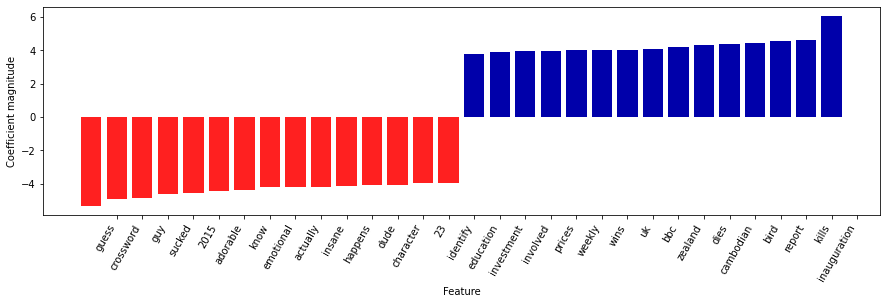

In [ ]:
def visualize_coefficients(coefficients, feature_names, n_top_features=25):

    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))

    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])

    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")

import matplotlib.pyplot as plt


coefs = logreg_count.coef_
feature_names = vect.get_feature_names()


visualize_coefficients(coefs, feature_names, n_top_features=15)

## Logistic Regression Model 2: Tf-idf Vectorizer 

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test, example_data, lstm_model, lstm_model2 = ai.import_quickstart_data("clickbait")


vect = TfidfVectorizer(min_df=5, norm=None, stop_words="english").fit(X_train)

X_train2 = vect.transform(X_train)
X_test2 = vect.transform(X_test)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_train2, y_train, random_state=42)


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train3, y_train3)
print("Best cross-validation score: {:.2f}".format(grid.best_score_)) # cross validation
print("Best Parameter: {}".format(grid.best_params_))


Data downloaded successfully.

Preparing downloaded files for use...

Success! Your Quick Start materials have been downloaded. 
You are now ready to run the tutorial.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best cross-validation score: 0.95
Best Parameter: {'C': 0.01}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test, y_train, y_test, example_data, lstm_model, lstm_model2 = ai.import_quickstart_data("clickbait")

vect = TfidfVectorizer(min_df=5, norm=None).fit(X_train)


X_train2 = vect.transform(X_train)
X_test2 = vect.transform(X_test)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_train2, y_train, random_state=42)


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train3, y_train3)
print("Best cross-validation score: {:.2f}".format(grid.best_score_)) # cross validation
print("Best Parameter: {}".format(grid.best_params_))


Data downloaded successfully.

Preparing downloaded files for use...

Success! Your Quick Start materials have been downloaded. 
You are now ready to run the tutorial.


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Best cross-validation score: 0.97
Best Parameter: {'C': 0.1}


In [ ]:

logreg_tfidf = LogisticRegression( C=0.1).fit(X_train3, y_train3)
y_test_pred = logreg_tfidf.predict(X_test3)
y_test_true = y_test3

y_train_pred = logreg_tfidf.predict(X_train3)
y_train_true = y_train3


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# training score

print("normalized training accuracy score", accuracy_score(y_train_true == "clickbait", y_train_pred== "clickbait", normalize=True)) 
print("unnormalized training accuracy score", accuracy_score(y_train_true == "clickbait", y_train_pred== "clickbait", normalize=False))
print("roc auc score", roc_auc_score(y_train_true == "clickbait", y_train_pred== "clickbait")) 
print("f-1 score", f1_score(y_train_true == "clickbait", y_train_pred== "clickbait")) 

normalized training accuracy score 0.9982384968506459
unnormalized training accuracy score 18701
roc auc score 0.9982357546988546
f-1 score 0.9982118667027906


In [ ]:
# testing score
print("normalized testing accuracy score", accuracy_score(y_test_true == "clickbait", y_test_pred== "clickbait", normalize=True)) 
print("unnormalized testing accuracy score", accuracy_score(y_test_true == "clickbait", y_test_pred== "clickbait", normalize=False))
print("roc auc score", roc_auc_score(y_test_true == "clickbait", y_test_pred== "clickbait")) 
print("f-1 score", f1_score(y_test_true == "clickbait", y_test_pred== "clickbait")) 

normalized testing accuracy score 0.9702161729383507
unnormalized testing accuracy score 6059
roc auc score 0.969976630854263
f-1 score 0.9685916919959474


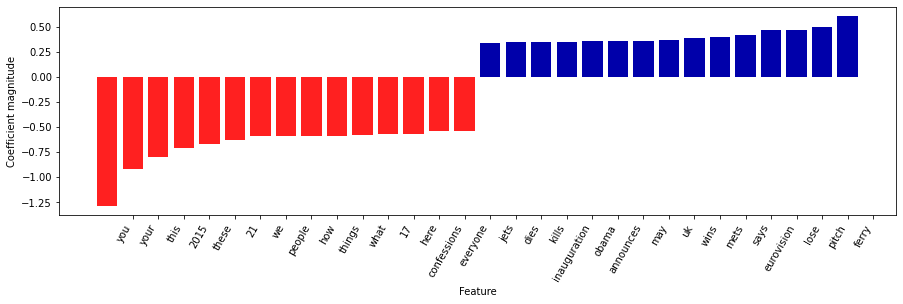

In [ ]:
def visualize_coefficients(coefficients, feature_names, n_top_features=25):

    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")

import matplotlib.pyplot as plt


coefs = logreg_tfidf.coef_
feature_names = vect.get_feature_names()

visualize_coefficients(coefs, feature_names, n_top_features=15)

## Logistic Regression Model 3: nltk

In [ ]:
! pip install nltk

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 

stemmer = nltk.stem.PorterStemmer()

class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]
    

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
X_train, X_test, y_train, y_test, example_data, lstm_model, lstm_model2 = ai.import_quickstart_data("clickbait")

vect = CountVectorizer(min_df=5, stop_words="english", tokenizer=LemmaTokenizer()).fit(X_train)

X_train2 = vect.transform(X_train)
X_test2 = vect.transform(X_test)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X_train2, y_train, random_state=42)


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]}
grid = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid.fit(X_train3, y_train3)
print("Best cross-validation score: {:.2f}".format(grid.best_score_)) # cross validation
print("Best Parameter: {}".format(grid.best_params_))


Data downloaded successfully.

Preparing downloaded files for use...

Success! Your Quick Start materials have been downloaded. 
You are now ready to run the tutorial.


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:489: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"
/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warni

Best cross-validation score: 0.95
Best Parameter: {'C': 1}


In [ ]:

logreg_nltk = LogisticRegression(C=1).fit(X_train3, y_train3)
y_test_pred = logreg_nltk.predict(X_test3)
y_test_true = y_test3

y_train_pred = logreg_nltk.predict(X_train3)
y_train_true = y_train3


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score

# training score

print("normalized training accuracy score", accuracy_score(y_train_true == "clickbait", y_train_pred== "clickbait", normalize=True)) 
print("unnormalized training accuracy score", accuracy_score(y_train_true == "clickbait", y_train_pred== "clickbait", normalize=False))
print("roc auc score", roc_auc_score(y_train_true == "clickbait", y_train_pred== "clickbait")) 
print("f-1 score", f1_score(y_train_true == "clickbait", y_train_pred== "clickbait")) 

normalized training accuracy score 0.9810504964236149
unnormalized training accuracy score 18379
roc auc score 0.9809512065123722
f-1 score 0.9806402355892457


In [ ]:
# testing score
print("normalized testing accuracy score", accuracy_score(y_test_true == "clickbait", y_test_pred== "clickbait", normalize=True)) 
print("unnormalized testing accuracy score", accuracy_score(y_test_true == "clickbait", y_test_pred== "clickbait", normalize=False))
print("roc auc score", roc_auc_score(y_test_true == "clickbait", y_test_pred== "clickbait")) 
print("f-1 score", f1_score(y_test_true == "clickbait", y_test_pred== "clickbait")) 

normalized testing accuracy score 0.9518014411529223
unnormalized testing accuracy score 5944
roc auc score 0.9511709039948779
f-1 score 0.9487833928875277


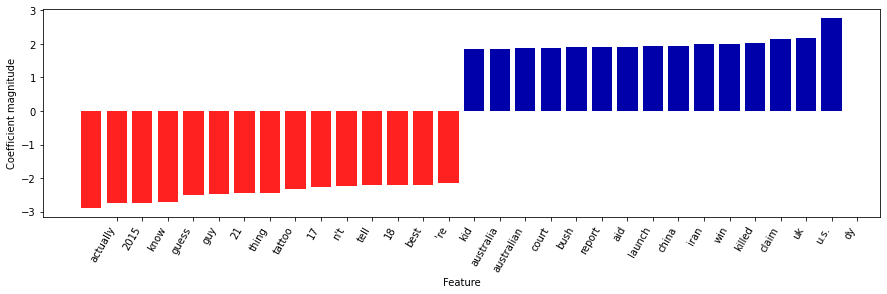

In [ ]:
def visualize_coefficients(coefficients, feature_names, n_top_features=25):

    coefficients = coefficients.squeeze()
    if coefficients.ndim > 1:
        raise ValueError("coeffients must be 1d array or column vector, got"
                         " shape {}".format(coefficients.shape))
    coefficients = coefficients.ravel()

    if len(coefficients) != len(feature_names):
        raise ValueError("Number of coefficients {} doesn't match number of"
                         "feature names {}.".format(len(coefficients),
                                                    len(feature_names)))
    coef = coefficients.ravel()
    positive_coefficients = np.argsort(coef)[-n_top_features:]
    negative_coefficients = np.argsort(coef)[:n_top_features]
    interesting_coefficients = np.hstack([negative_coefficients,
                                          positive_coefficients])
    plt.figure(figsize=(15, 5))
    colors = ['#ff2020' if c < 0 else '#0000aa'
              for c in coef[interesting_coefficients]]
    plt.bar(np.arange(2 * n_top_features), coef[interesting_coefficients],
            color=colors)
    feature_names = np.array(feature_names)
    plt.subplots_adjust(bottom=0.3)
    plt.xticks(np.arange(1, 1 + 2 * n_top_features),
               feature_names[interesting_coefficients], rotation=60,
               ha="right")
    plt.ylabel("Coefficient magnitude")
    plt.xlabel("Feature")

import matplotlib.pyplot as plt


coefs = logreg_nltk.coef_
feature_names = vect.get_feature_names()

visualize_coefficients(coefs, feature_names, n_top_features=15)

# Comparison between three vectorizers

The Roc-auc test scores for count, Tf-idf, and nltk vectorizers are 0.968, 0.971, 0.969 respectively. According to the ROC AUC score, Tf-idf vectorizer has a slightly higher score, and thus the most efficient among the three vectorizers. 

Similarly, F-1 scores for the three vectorizers are 0.966, 0.970, 0.968, respectively. F-1 score also shows that Tf-idf vectorizer is the most efficient.

Thus, I would choose **Tf-idf vectorizer** as my model. 

# Part 2:  Build a predictive neural network using Keras

In [ ]:
import pandas as pd

data = pd.read_csv("http://vincentarelbundock.github.io/Rdatasets/csv/datasets/iris.csv")


#update data to set up for train test split
data = data.iloc[:,1:]
y = data['Species']
X = data.loc[:, data.columns != 'Species']

display(pd.get_dummies(y))
display(data.head())
display(X.head())
display(y[0::10])

print(data.shape)
print(X.shape)
print(y.shape)

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


0          setosa
10         setosa
20         setosa
30         setosa
40         setosa
50     versicolor
60     versicolor
70     versicolor
80     versicolor
90     versicolor
100     virginica
110     virginica
120     virginica
130     virginica
140     virginica
Name: Species, dtype: object

(150, 5)
(150, 4)
(150,)


In [ ]:
#from keras.utils import np_utils
#y = np_utils.to_categorical(y, num_classes = 3)
y_onehoc=y
unique_y = y.unique()
i = 0
for label in unique_y : 
  y_onehoc [y_onehoc==label] = i
  i+=1

from keras.utils import np_utils
y_onehoc = np_utils.to_categorical(y_onehoc, num_classes = 3)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehoc, random_state=42) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
print(y.shape)

(150,)


In [ ]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
import numpy
import pandas as pd

# simple example

# Function to create model, required for KerasClassifier
def create_model(hiddennodes=1):
	# create model
	model = Sequential()
	model.add(Dense(hiddennodes, input_dim=4, activation='relu'))
	model.add(Dense(hiddennodes, activation='relu'))
	model.add(Dense(3, activation='sigmoid'))
	optimizer = SGD(learning_rate=0.01)
	model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy']) 

	return model

model = KerasClassifier(build_fn=create_model, epochs=200, verbose=1) 
param_grid = dict(hiddennodes=[ 10, 20, 30, 80, 200])
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(X_train, y_train)

print(grid_result.best_params_)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.


ValueError: ignored

In [ ]:
print(grid_result.cv_results_['mean_test_score'])

[0.89169961 0.91818182 0.90118577 0.91897234 0.90079052]


In [ ]:
y_test_1col = np.zeros(len(y_test))
for i in range(y_test.shape[1]):
  y_test_1col[np.where(y_test[:,i]==1)[0]] = i

y_train_1col = np.zeros(len(y_train))
for i in range(y_train.shape[1]):
  y_train_1col[np.where(y_train[:,i]==1)[0]] = i


In [ ]:

y_test_pred = grid_result.predict(X_test)
y_test_true = y_test_1col

y_train_pred = grid_result.predict(X_train)
y_train_true = y_train_1col

In [ ]:
# grid_result.cv_results_ for full results file
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print(" training accuracy score", accuracy_score(y_train_true, y_train_pred))
print(" testing accuracy score", accuracy_score(y_test_true, y_test_pred))


Best: 0.918972 using {'hiddennodes': 80}
 training accuracy score 0.9553571428571429
 testing accuracy score 0.9736842105263158


## Describe the differences in the predictive accuracy of models with different numbers of hidden units.  



## Describe the predictive strength of your best model.  Be sure to explain your choice and evaluate this model using the test set.



Using 80 as a hidden node (the best parameter), the accuracy score I obtained on test data set is 0.97.



Evaluating on the test set, the strength of my best model is 2.38 (loss) and 0.17 (accuracy).
